In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
selected_cols = list(range(0, 100)) + list(range(132, 160))

# biao12=biao11.iloc[selected_cols,4:23]
# biao22=biao21.iloc[selected_cols,2:]
new_row_indices = list(range(100, 128))
# biao12 = biao12.rename(index=dict(zip(range(130, 160), new_row_indices)))
# biao22 = biao22.rename(index=dict(zip(range(130, 160), new_row_indices)))
# biao22

In [4]:
biao1=r'D:\code\数学建模模版\数据集\竞赛发布数据\表1-患者列表及临床信息.xlsx'
biao2=r'D:\code\数学建模模版\数据集\竞赛发布数据\表2-患者影像信息血肿及水肿的体积及位置.xlsx'
biao11=pd.read_excel(biao1).iloc[selected_cols,16:]
biao21=pd.read_excel(biao2).iloc[selected_cols,:]
biao11 = biao11.rename(index=dict(zip(range(132, 160), new_row_indices)))
biao21 = biao21.rename(index=dict(zip(range(132, 160), new_row_indices)))

biao11

,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经
0,0,1,1,1,1,1,1
1,0,1,1,1,0,1,1
2,0,1,1,1,1,1,1
3,0,1,1,1,0,0,0
4,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...
123,0,1,1,1,0,1,1
124,1,0,1,1,1,1,1
125,0,1,1,1,1,1,1
126,0,1,1,1,1,1,1


In [5]:
train=biao11
train['HM_volume']=biao21['HM_volume']
train['ED_volume']=biao21['ED_volume']
train

,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静、镇痛治疗,止吐护胃,营养神经,HM_volume,ED_volume
0,0,1,1,1,1,1,1,69714,48919
1,0,1,1,1,0,1,1,47500,23526
2,0,1,1,1,1,1,1,86396,32621
3,0,1,1,1,0,0,0,45498,22191
4,0,1,1,0,0,1,1,14832,47392
...,...,...,...,...,...,...,...,...,...
123,0,1,1,1,0,1,1,32559,8968
124,1,0,1,1,1,1,1,18150,409
125,0,1,1,1,1,1,1,27969,17948
126,0,1,1,1,1,1,1,53154,14430


<h2>选出变量</h2>

体积应该是自变量
治疗措施应该是因变量

<h2>热力图</h2>

In [6]:
train.to_excel('./数据集/train2-4.xlsx', index=False)

In [7]:
import pandas as pd
import numpy as np

# 创建一个DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})

# 将DataFrame转换为NumPy数组
array = df.to_numpy()

# 打印NumPy数组
print(array)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [8]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 创建数据集
data = {
    'Drug': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M'],
    'Age': ['Young', 'Middle', 'Old', 'Old', 'Young', 'Middle', 'Young', 'Old', 'Middle'],
    'RecoveryTime': [10, 12, 8, 9, 11, 13, 7, 6, 10]
}

df = pd.DataFrame(data)

# 进行多因素方差分析
model = ols('RecoveryTime ~ Drug + Gender + Age', data=df).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

           df     sum_sq    mean_sq           F    PR(>F)
Drug      2.0  17.555556   8.777778   97.230769  0.001873
Gender    1.0   0.055556   0.055556    0.615385  0.490009
Age       2.0  24.340278  12.170139  134.807692  0.001154
Residual  3.0   0.270833   0.090278         NaN       NaN


In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
train = train.rename(columns={'镇静、镇痛治疗': '镇静治疗'})
# # 创建数据集
# data = {
#     'Drug': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
#     'Gender': ['M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M'],
#     'Age': ['Young', 'Middle', 'Old', 'Old', 'Young', 'Middle', 'Young', 'Old', 'Middle'],
#     'RecoveryTime': [10, 12, 8, 9, 11, 13, 7, 6, 10]
# }

# df = pd.DataFrame(data)

# 进行多因素方差分析
model = ols('HM_volume ~ 脑室引流 + 止血治疗 + 降压治疗 + 降颅压治疗 + 止吐护胃 + 营养神经 + 镇静治疗', data=train).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

             df        sum_sq       mean_sq          F    PR(>F)
脑室引流        1.0  7.835648e+09  7.835648e+09  10.039740  0.001944
止血治疗        1.0  3.081139e+08  3.081139e+08   0.394783  0.530990
降压治疗        1.0  3.328958e+08  3.328958e+08   0.426536  0.514943
降颅压治疗       1.0  2.462670e+09  2.462670e+09   3.155396  0.078211
止吐护胃        1.0  4.751469e+08  4.751469e+08   0.608801  0.436776
营养神经        1.0  7.144716e+07  7.144716e+07   0.091545  0.762747
镇静治疗        1.0  8.870300e+08  8.870300e+08   1.136543  0.288524
Residual  120.0  9.365559e+10  7.804633e+08        NaN       NaN


In [17]:
anova_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 脑室引流 to Residual
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   df       8 non-null      float64
 1   sum_sq   8 non-null      float64
 2   mean_sq  8 non-null      float64
 3   F        7 non-null      float64
 4   PR(>F)   7 non-null      float64
dtypes: float64(5)
memory usage: 684.0+ bytes


In [19]:

anova_table.to_csv('./数据集/result2-4.xlsx',index=False)

In [20]:
a=pd.DataFrame(anova_table)

In [21]:
a

,df,sum_sq,mean_sq,F,PR(>F)
脑室引流,1.0,7.835648e+09,7.835648e+09,10.039740,0.001944
止血治疗,1.0,3.081139e+08,3.081139e+08,0.394783,0.530990
降压治疗,1.0,3.328958e+08,3.328958e+08,0.426536,0.514943
降颅压治疗,1.0,2.462670e+09,2.462670e+09,3.155396,0.078211
止吐护胃,1.0,4.751469e+08,4.751469e+08,0.608801,0.436776
营养神经,1.0,7.144716e+07,7.144716e+07,0.091545,0.762747
镇静治疗,1.0,8.870300e+08,8.870300e+08,1.136543,0.288524
Residual,120.0,9.365559e+10,7.804633e+08,NaN,NaN


In [25]:
a.to_excel('./数据集/result2-4-1.xlsx')

In [26]:
model = ols('ED_volume ~ 脑室引流 + 止血治疗 + 降压治疗 + 降颅压治疗 + 止吐护胃 + 营养神经 + 镇静治疗', data=train).fit()
anova_table = sm.stats.anova_lm(model)
b=pd.DataFrame(anova_table)
b.to_excel('./数据集/result2-4-2.xlsx')

In [28]:
from sklearn.preprocessing import StandardScaler
# 创建StandardScaler对象
scaler = StandardScaler()

# 在DataFrame上拟合和转换数据
train['Norm'] = scaler.fit_transform(train[['ED_volume']])
train

,脑室引流,止血治疗,降颅压治疗,降压治疗,镇静治疗,止吐护胃,营养神经,HM_volume,ED_volume,Norm
0,0,1,1,1,1,1,1,69714,48919,2.269881
1,0,1,1,1,0,1,1,47500,23526,0.506991
2,0,1,1,1,1,1,1,86396,32621,1.138405
3,0,1,1,1,0,0,0,45498,22191,0.414310
4,0,1,1,0,0,1,1,14832,47392,2.163871
...,...,...,...,...,...,...,...,...,...,...
123,0,1,1,1,0,1,1,32559,8968,-0.503687
124,1,0,1,1,1,1,1,18150,409,-1.097889
125,0,1,1,1,1,1,1,27969,17948,0.119743
126,0,1,1,1,1,1,1,53154,14430,-0.124492


In [29]:
model = ols('Norm ~ 脑室引流 + 止血治疗 + 降压治疗 + 降颅压治疗 + 止吐护胃 + 营养神经 + 镇静治疗', data=train).fit()
anova_table = sm.stats.anova_lm(model)
c=pd.DataFrame(anova_table)
c

,df,sum_sq,mean_sq,F,PR(>F)
脑室引流,1.0,10.962101,10.962101,11.887363,0.000780
止血治疗,1.0,0.011289,0.011289,0.012242,0.912084
降压治疗,1.0,0.322901,0.322901,0.350156,0.555138
降颅压治疗,1.0,1.063897,1.063897,1.153696,0.284932
止吐护胃,1.0,0.052881,0.052881,0.057345,0.811152
营养神经,1.0,0.926752,0.926752,1.004975,0.318127
镇静治疗,1.0,4.000480,4.000480,4.338143,0.039392
Residual,120.0,110.659700,0.922164,NaN,NaN


<h2>热力图</h2>

In [33]:
train=train.drop('Norm',axis=1)

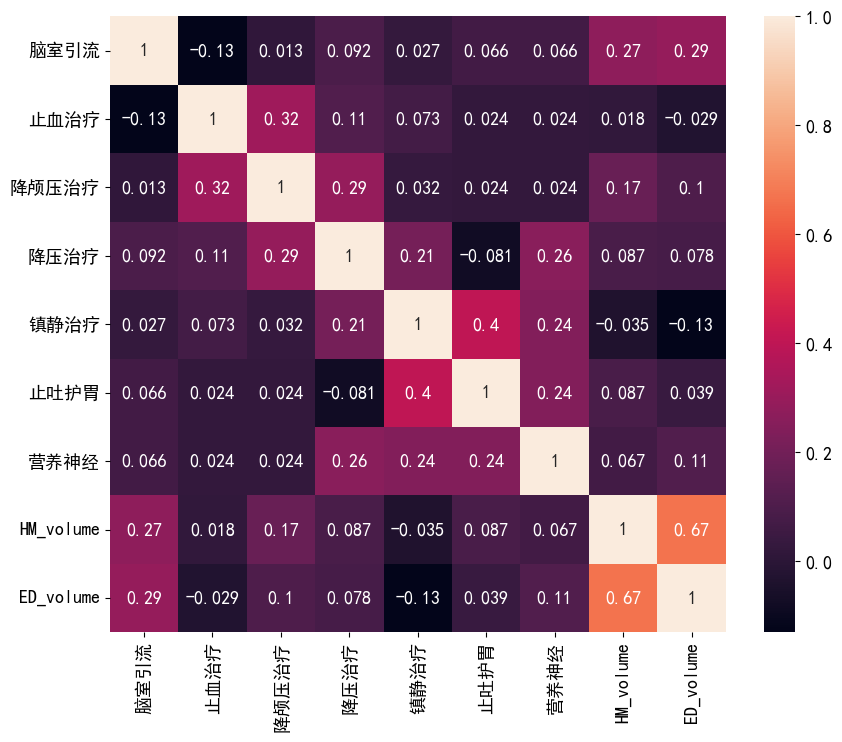

In [37]:
# k = 10 # 找出十个与target变量最相关的特征变量
# cols = train_corr.nlargest(k, 'target')['target'].index

import matplotlib.pyplot as plt

plt.rc('font', family='SimHei', size=13)

# plt.figure(figsize=(10,20))  
cm = np.corrcoef(train.values.T)                                          # 转成 numpy 向量组 
hm = plt.subplots(figsize=(10, 8))#调整画布大小
hm = sns.heatmap(train.corr(),annot=True,square=True)



plt.show()